<a href="https://colab.research.google.com/github/avaramahmood/Machine-Learning-Course/blob/main/UCB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!wget https://raw.githubusercontent.com/avaramahmood/Machine-Learning-Course/refs/heads/main/Datasets/Ads_CTR_Optimisation.csv

--2025-06-30 14:40:54--  https://raw.githubusercontent.com/avaramahmood/Machine-Learning-Course/refs/heads/main/Datasets/Ads_CTR_Optimisation.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 210050 (205K) [text/plain]
Saving to: ‘Ads_CTR_Optimisation.csv’

Ads_CTR_Optimisatio 100%[===================>] 205.13K  --.-KB/s    in 0.006s  

2025-06-30 14:40:54 (34.1 MB/s) - ‘Ads_CTR_Optimisation.csv’ saved [210050/210050]



In [3]:
df = pd.read_csv('Ads_CTR_Optimisation.csv')

In [8]:
N = 10000
d = 10
ads_selected = []
numbers_of_selections = [0]*d
sums_of_rewards = [0]*d
total_reward = 0

In [19]:
for n in range(0,N) :
  ad = 0
  max_upper_bound = 0
  for i in range(0,d) :
    if (numbers_of_selections[i] > 0) :
      average_reward = sums_of_rewards[i] / numbers_of_selections[i]
      delta_i = np.sqrt(3/2 * np.log(n+1) / numbers_of_selections[i])
      upper_bound = average_reward + delta_i
    else :
      upper_bound = 1e400
    if(upper_bound > max_upper_bound) :
      max_upper_bound = upper_bound
      ad = i
  ads_selected.append(ad)
  numbers_of_selections[ad] = numbers_of_selections[ad] + 1
  reward = df.values[n,ad]
  sums_of_rewards[ad] = sums_of_rewards[ad] + reward
  total_reward = total_reward + reward

Visualizing

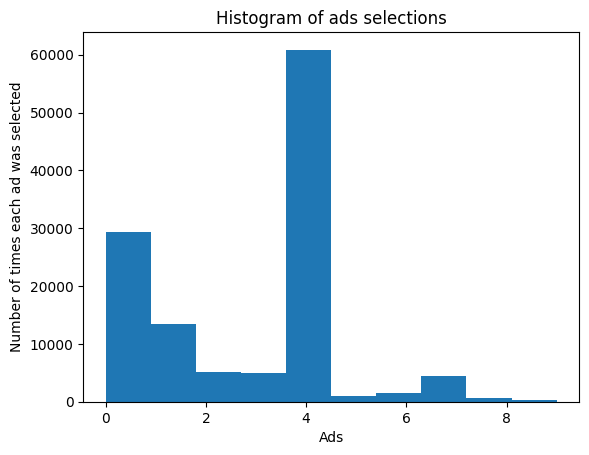

In [20]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()